https://www.kaggle.com/code/sarvagnyadeshpanday/vegetable-cnn

In [ ]:
%cd /content/drive/MyDrive/인공지능 기말/

/content/drive/MyDrive/인공지능 기말


In [ ]:
import numpy as np
import tensorflow as tf
import pandas as pd
import io
import matplotlib.pyplot as plt
from matplotlib import image
from pathlib import Path
import os.path
from PIL import Image
from keras.utils import np_utils

In [ ]:
def load_imgs(img_path):
    imgs=[]
    label=[]
    label1=os.listdir(img_path)
    for index in label1:
        label2 = os.listdir(img_path+'/' + index)
        for index2 in label2:
            c=0
            img=Image.open(img_path+'/' + index + '/' + index2).convert('RGB')
            img=img.resize(size=(64,64))
            #img=img.convert('L')
            img=np.array(img,dtype=np.float16)/255
            imgs.append(np.array(img)) #.flatten())
            label.append(index)
            del img
    return np.array(imgs),label

In [ ]:
X_train, y_train=load_imgs('./Vegetable Images/train')
X_test, y_test=load_imgs('./Vegetable Images/test')
X_val, y_val=load_imgs('./Vegetable Images/validation')

In [ ]:
import os

vege_name = os.listdir('./Vegetable Images/train')

In [ ]:
X_test.shape

(3000, 64, 64, 3)

In [ ]:
vege_name

['Bean',
 'Bitter_Gourd',
 'Bottle_Gourd',
 'Brinjal',
 'Broccoli',
 'Cabbage',
 'Capsicum',
 'Carrot',
 'Cauliflower',
 'Cucumber',
 'Papaya',
 'Potato',
 'Pumpkin',
 'Radish',
 'Tomato']

<BarContainer object of 15 artists>

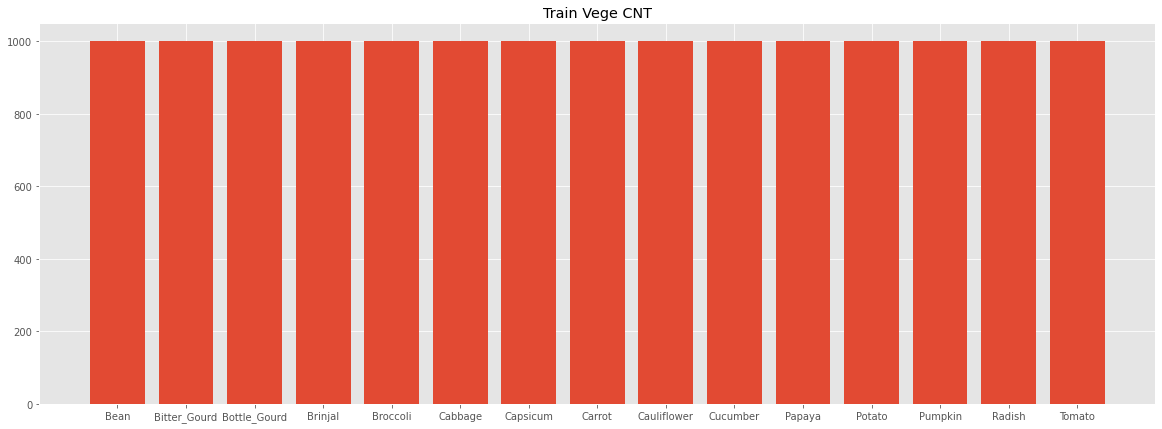

In [ ]:
vege_cnt = []
for i in range(15):
    cnt = os.listdir('./Vegetable Images/train/' + vege_name[0])
    vege_cnt.append(len(cnt))
plt.figure(figsize=(20,7))
plt.title("Train Vege CNT")
plt.bar(vege_name, vege_cnt)

<BarContainer object of 15 artists>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

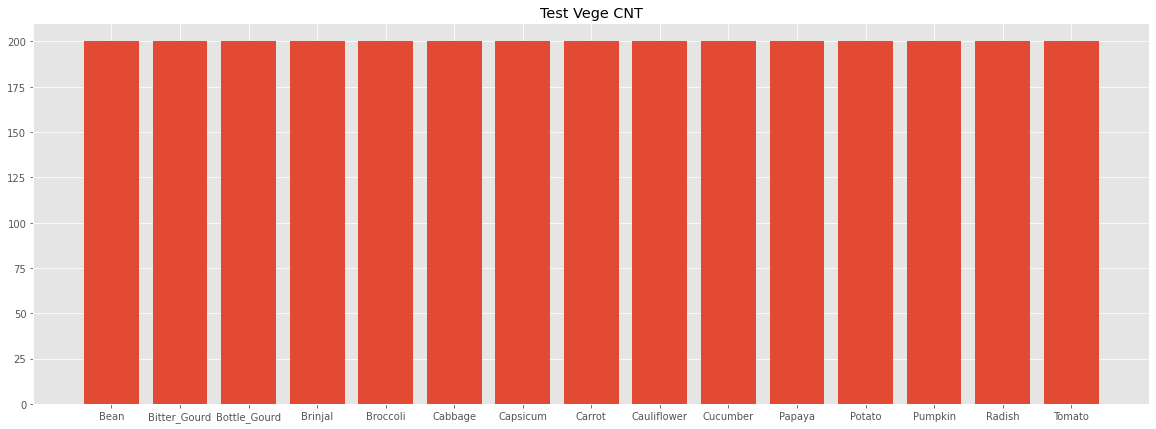

In [ ]:
vege_cnt = []
for i in range(15):
    cnt = os.listdir('./Vegetable Images/test/' + vege_name[0])
    vege_cnt.append(len(cnt))
    plt.figure(figsize=(20,7))
plt.title("Test Vege CNT")
plt.bar(vege_name, vege_cnt)

<BarContainer object of 15 artists>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

<Figure size 1440x504 with 0 Axes>

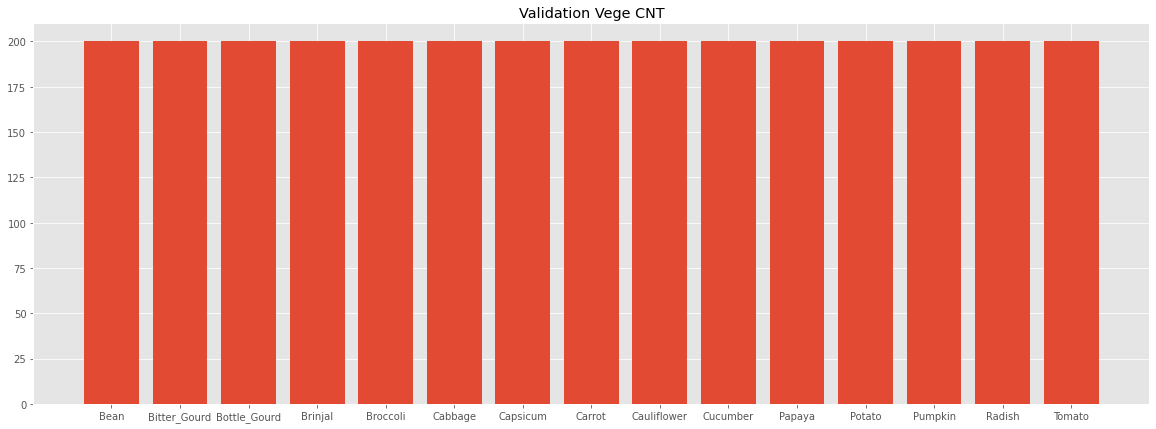

In [ ]:
vege_cnt = []
for i in range(15):
    cnt = os.listdir('./Vegetable Images/validation/' + vege_name[0])
    vege_cnt.append(len(cnt))
    plt.figure(figsize=(20,7))
plt.title("Validation Vege CNT")
plt.bar(vege_name, vege_cnt)

In [ ]:
X_train.shape

(15000, 64, 64, 3)

In [ ]:
#카테고리형 시리즈 만들고 레이블화
#훈련
X_train=np.array(X_train)
y_train=pd.Series(y_train,dtype='category')
#테스트
X_test=np.array(X_test)
y_test=pd.Series(y_test,dtype='category')
y_test_pred = pd.Series(y_test,dtype='category')
#검증
X_val=np.array(X_val)
y_val=pd.Series(y_val,dtype='category')
#범주화
y_train=y_train.cat.codes
y_test=y_test.cat.codes
y_val=y_val.cat.codes
# y_train = np_utils.to_categorical(y_train)
# y_test = np_utils.to_categorical(y_test)
# y_val = np_utils.to_categorical(y_val)

In [ ]:
y_test.shape

(3000,)

In [ ]:
len(np.unique(y_test))

15

In [ ]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape=(64,64,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(512,activation='relu'),
    tf.keras.layers.Dense(15,activation='softmax'),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 64)         0

In [ ]:
from tensorflow import keras
from tensorflow.keras.metrics import Precision, Recall, FalsePositives, FalseNegatives

In [ ]:
#성능 안오르면 멈춤
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
hist = model.fit(
    X_train,y_train,
    validation_data=(X_val,y_val),
    epochs=10,
    callbacks=early_stopping
)

Epoch 1/10
469/469 [==============================] - 12s 7ms/step - loss: 1.4541 - accuracy: 0.4993 - val_loss: 0.6846 - val_accuracy: 0.7810
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 0.4694 - accuracy: 0.8512 - val_loss: 0.5197 - val_accuracy: 0.8380
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 0.2336 - accuracy: 0.9278 - val_loss: 0.1974 - val_accuracy: 0.9397
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 0.1345 - accuracy: 0.9575 - val_loss: 0.1658 - val_accuracy: 0.9577
Epoch 5/10
469/469 [==============================] - 3s 5ms/step - loss: 0.1050 - accuracy: 0.9664 - val_loss: 0.1709 - val_accuracy: 0.9533
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 0.0767 - accuracy: 0.9757 - val_loss: 0.1212 - val_accuracy: 0.9637
Epoch 7/10
469/469 [==============================] - 3s 5ms/step - loss: 0.0662 - accuracy: 0.9799 - val_loss: 0.1134 - val_accuracy: 0.9667
Epoch

In [ ]:
model.evaluate(X_train,y_train)

469/469 [==============================] - 17s 36ms/step - loss: 0.0255 - accuracy: 0.9921


[0.02548339031636715, 0.9921333193778992]

In [ ]:
model.evaluate(X_val,y_val)

94/94 [==============================] - 3s 36ms/step - loss: 0.1518 - accuracy: 0.9643


[0.15183144807815552, 0.9643333554267883]

In [ ]:
test_loss, test_acc =model.evaluate(X_test,y_test)

94/94 [==============================] - 0s 4ms/step - loss: 0.1287 - accuracy: 0.9740


In [ ]:
res = model.predict(X_test)
res2 = model.predict(X_train)
res3 = model.predict(X_val)


94/94 [==============================] - 0s 2ms/step


In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, roc_auc_score



In [ ]:
def acc(_test, _y):
    Tp = 0
    Negative = 0
    cnt = 0
    for num in _test:
        if np.argmax(num)==_y[cnt]:
            Tp+=1
        else:
            Negative += 1
        cnt += 1
    print("맞춘 갯수 : ", Tp)
    print("틀린 갯수 : ", Negative)
    print("정확도 : ", Tp/(Tp+Negative), "%")

In [ ]:
acc(res, y_test)

맞춘 갯수 :  2852
틀린 갯수 :  148
정확도 :  0.9506666666666667 %


In [ ]:
res[4]

array([9.8704278e-01, 1.7978855e-04, 2.9386561e-05, 3.0836116e-05,
       7.7199838e-06, 1.2516144e-06, 1.8664728e-08, 7.4807225e-08,
       1.2357995e-02, 2.5528844e-04, 4.4100480e-07, 3.0344728e-07,
       8.8128992e-08, 4.4048196e-05, 4.9846029e-05], dtype=float32)

In [ ]:
list_res = []
for i in range(len(res)):
    list_res.append(np.argmax(res[i]))

In [ ]:
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()

94/94 [==============================] - 0s 3ms/step
[ 0  0  0 ... 14 14 14]


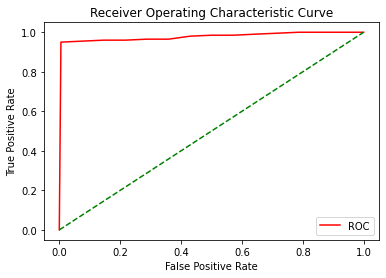

In [ ]:
from sklearn.metrics import roc_curve


y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred, axis=-1)
print(y_pred)
fper, tper, thresholds = roc_curve(y_test, y_pred, pos_label=14)
plot_roc_curve(fper, tper)

In [ ]:
a = confusion_matrix(y_test, list_res)

'              precision    recall  f1-score   support\n\n           0       0.93      0.99      0.96       200\n           1       0.99      0.96      0.98       200\n           2       0.99      0.97      0.98       200\n           3       0.93      0.99      0.96       200\n           4       1.00      0.47      0.63       200\n           5       1.00      0.95      0.98       200\n           6       0.97      0.98      0.98       200\n           7       0.98      0.98      0.98       200\n           8       0.98      0.95      0.97       200\n           9       0.98      0.95      0.97       200\n          10       0.99      0.98      0.99       200\n          11       0.89      1.00      0.94       200\n          12       0.65      0.98      0.78       200\n          13       0.98      0.99      0.99       200\n          14       0.98      0.88      0.93       200\n\n    accuracy                           0.94      3000\n   macro avg       0.95      0.94      0.93      3000\nweighted avg       0.95      0.94      0.93      3000\n'

In [ ]:
s = '              precision    recall  f1-score   support\n\n           0       0.93      0.99      0.96       200\n           1       0.99      0.96      0.98       200\n           2       0.99      0.97      0.98       200\n           3       0.93      0.99      0.96       200\n           4       1.00      0.47      0.63       200\n           5       1.00      0.95      0.98       200\n           6       0.97      0.98      0.98       200\n           7       0.98      0.98      0.98       200\n           8       0.98      0.95      0.97       200\n           9       0.98      0.95      0.97       200\n          10       0.99      0.98      0.99       200\n          11       0.89      1.00      0.94       200\n          12       0.65      0.98      0.78       200\n          13       0.98      0.99      0.99       200\n          14       0.98      0.88      0.93       200\n\n    accuracy                           0.94      3000\n   macro avg       0.95      0.94      0.93      3000\nweighted avg       0.95      0.94      0.93      3000\n'

In [ ]:
print(s)

              precision    recall  f1-score   support

           0       0.93      0.99      0.96       200
           1       0.99      0.96      0.98       200
           2       0.99      0.97      0.98       200
           3       0.93      0.99      0.96       200
           4       1.00      0.47      0.63       200
           5       1.00      0.95      0.98       200
           6       0.97      0.98      0.98       200
           7       0.98      0.98      0.98       200
           8       0.98      0.95      0.97       200
           9       0.98      0.95      0.97       200
          10       0.99      0.98      0.99       200
          11       0.89      1.00      0.94       200
          12       0.65      0.98      0.78       200
          13       0.98      0.99      0.99       200
          14       0.98      0.88      0.93       200

    accuracy                           0.94      3000
   macro avg       0.95      0.94      0.93      3000
weighted avg       0.95   

In [ ]:
a

array([[197,   1,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0],
       [  2, 191,   0,   1,   0,   0,   0,   0,   1,   2,   0,   0,   1,
          0,   2],
       [  1,   0, 199,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   1, 197,   1,   1,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  1,   0,   0,   0, 195,   2,   0,   0,   0,   0,   0,   0,   2,
          0,   0],
       [  0,   0,   0,   1,   5, 187,   0,   0,   2,   2,   0,   0,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0, 197,   1,   0,   0,   0,   0,   1,
          0,   1],
       [  0,   0,   0,   0,   0,   0,   0, 199,   0,   0,   0,   0,   0,
          0,   1],
       [  0,   0,   0,   3,   2,   0,   0,   0, 192,   0,   1,   0,   0,
          0,   2],
       [  0,   0,   2,   1,   0,   0,   0,   0,   0, 196,   1,   0,   0,
          0,   0],
       [  0,   0,   2,   2,   0,   0,   0,   0,   0,   0, 195,   0,   0,
       

In [ ]:
a[0]

array([197,   1,   0,   0,   1,   0,   0,   0,   0,   0,   0,   0,   1,
         0,   0])

Text(114.0, 0.5, 'Real')

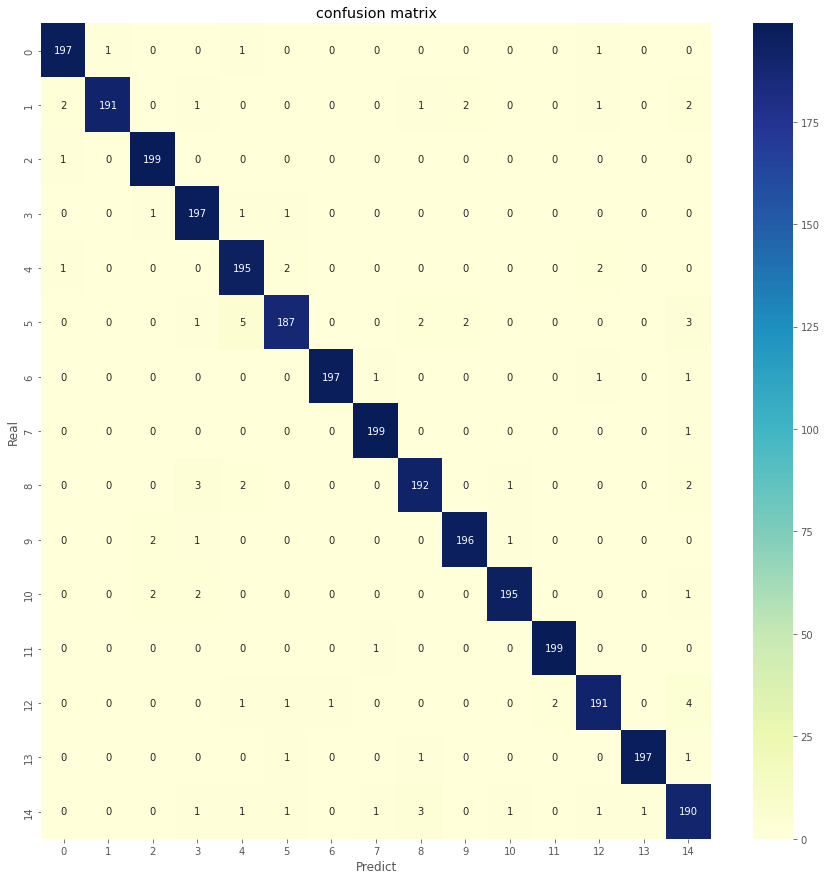

In [ ]:
import seaborn as sns

m = pd.DataFrame(a, index = [i for i in range(len(a[0]))], columns = [i for i in range(len(a[0]))])
plt.figure(figsize=(15,15))
plt.title("confusion matrix")
con_matric = sns.heatmap(m,annot=True,fmt='d',cmap="YlGnBu")
con_matric.set_xlabel("Predict")
con_matric.set_ylabel("Real")

In [ ]:
classification_report(y_test, list_res)

'              precision    recall  f1-score   support\n\n           0       0.98      0.98      0.98       200\n           1       0.99      0.95      0.97       200\n           2       0.98      0.99      0.99       200\n           3       0.96      0.98      0.97       200\n           4       0.95      0.97      0.96       200\n           5       0.97      0.94      0.95       200\n           6       0.99      0.98      0.99       200\n           7       0.99      0.99      0.99       200\n           8       0.96      0.96      0.96       200\n           9       0.98      0.98      0.98       200\n          10       0.98      0.97      0.98       200\n          11       0.99      0.99      0.99       200\n          12       0.97      0.95      0.96       200\n          13       0.99      0.98      0.99       200\n          14       0.93      0.95      0.94       200\n\n    accuracy                           0.97      3000\n   macro avg       0.97      0.97      0.97      3000\nweigh

              precision    recall  f1-score   support

           0       0.95      0.94      0.95       200
           1       0.93      0.97      0.95       200
           2       0.97      0.97      0.97       200
           3       0.97      0.93      0.95       200
           4       0.95      0.92      0.94       200
           5       0.96      0.92      0.94       200
           6       0.93      0.97      0.95       200
           7       1.00      1.00      1.00       200
           8       0.93      0.94      0.94       200
           9       0.98      0.98      0.98       200
          10       0.99      0.96      0.97       200
          11       0.99      0.98      0.99       200
          12       0.92      0.95      0.94       200
          13       0.97      0.97      0.97       200
          14       0.92      0.95      0.94       200

    accuracy                           0.96      3000
   macro avg       0.96      0.96      0.96      3000
weighted avg       0.96      0.96      0.96      3000

In [ ]:
#               precision    recall  f1-score   support

#            0       0.98      0.97      0.98       200
#            1       0.98      0.97      0.98       200
#            2       0.99      1.00      1.00       200
#            3       0.98      0.96      0.97       200
#            4       0.94      0.94      0.94       200
#            5       0.94      0.93      0.93       200
#            6       1.00      0.98      0.99       200
#            7       0.99      1.00      0.99       200
#            8       0.92      0.97      0.94       200
#            9       0.96      0.99      0.98       200
#           10       0.99      0.99      0.99       200
#           11       0.98      0.99      0.99       200
#           12       0.98      0.92      0.95       200
#           13       0.98      0.99      0.99       200
#           14       0.93      0.92      0.92       200

#     accuracy                           0.97      3000
#    macro avg       0.97      0.97      0.97      3000
# weighted avg       0.97      0.97      0.97      3000


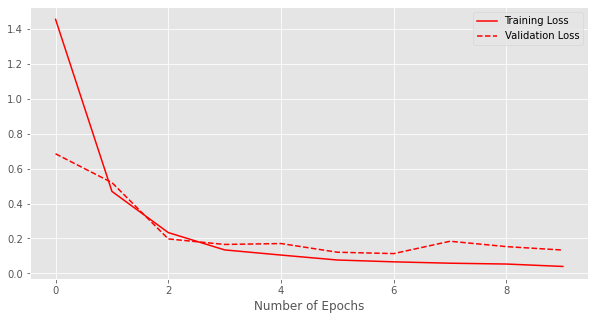

In [ ]:
h = hist.history
plt.style.use('ggplot')
plt.figure(figsize=(10, 5))
plt.plot(h['loss'], c='red', label='Training Loss')
plt.plot(h['val_loss'], c='red', linestyle='--', label='Validation Loss')
plt.xlabel("Number of Epochs")
plt.legend(loc='best')
plt.show()

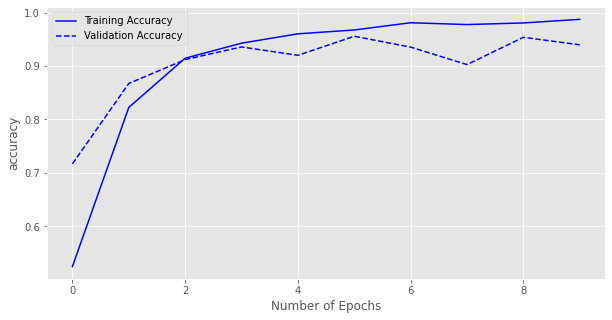

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(h['accuracy'], c='blue', label='Training Accuracy')
plt.plot(h['val_accuracy'], c='blue', linestyle='--', label='Validation Accuracy')
plt.xlabel("Number of Epochs")
plt.ylabel("accuracy")
plt.legend(loc='best')
plt.show()

In [ ]:
pip install wandb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 7.2 MB/s 
     |████████████████████████████████| 168 kB 59.4 MB/s 
     |████████████████████████████████| 182 kB 63.8 MB/s 
     |████████████████████████████████| 62 kB 764 kB/s 
     |████████████████████████████████| 168 kB 46.5 MB/s 
     |████████████████████████████████| 166 kB 67.8 MB/s 
     |████████████████████████████████| 166 kB 62.4 MB/s 
     |████████████████████████████████| 162 kB 49.0 MB/s 
     |████████████████████████████████| 162 kB 39.5 MB/s 
     |████████████████████████████████| 158 kB 63.6 MB/s 
     |████████████████████████████████| 157 kB 61.0 MB/s 
     |████████████████████████████████| 157 kB 42.8 MB/s 
     |████████████████████████████████| 157 kB 62.3 MB/s 
     |████████████████████████████████| 157 kB 62.8 MB/s 
     |████████████████████████████████| 157 kB 65.6 MB/s 
     |████████████████████████████

In [ ]:
import wandb
import tensorflow as tf

wandb.init(project="test-project", entity="aifinal")



In [ ]:
##############################################################

In [ ]:
%cd /content/drive/MyDrive/인공지능 기말/
import numpy as np
import tensorflow as tf
import pandas as pd
import io
import matplotlib.pyplot as plt
from matplotlib import image
from pathlib import Path
import os.path
from PIL import Image

/content/drive/MyDrive/인공지능 기말


In [ ]:
def load_imgs(img_path):
    imgs=[]
    label=[]
    label1=os.listdir(img_path)
    for index in label1:
        label2 = os.listdir(img_path+'/' + index)
        for index2 in label2:
            c=0
            img=Image.open(img_path+'/' + index + '/' + index2).convert('RGB')
            img=img.resize(size=(224,224))
            #img=img.convert('L')
            img=np.array(img,dtype=np.float16)/255
            imgs.append(np.array(img)) #.flatten())
            label.append(index)
            del img
    return np.array(imgs),label

In [ ]:
X_train, y_train=load_imgs('./Vegetable Images/train')
X_test, y_test=load_imgs('./Vegetable Images/test')
X_val, y_val=load_imgs('./Vegetable Images/validation')

In [ ]:
X_train.shape

(15000, 224, 224, 3)

In [ ]:
#카테고리형 시리즈 만들고 레이블화
#훈련
X_train=np.array(X_train)
y_train=pd.Series(y_train,dtype='category')
#테스트
X_test=np.array(X_test)
y_test=pd.Series(y_test,dtype='category')
#검증
X_val=np.array(X_val)
y_val=pd.Series(y_val,dtype='category')
#범주화
y_train=y_train.cat.codes
y_test=y_test.cat.codes
y_val=y_val.cat.codes

https://wjunsea.tistory.com/94

https://buomsoo-kim.github.io/keras/2018/05/05/Easy-deep-learning-with-Keras-11.md/


batch normalization은 학습 과정에서 각 배치 단위 별로 데이터가 다양한 분포를 가지더라도 각 배치별로 평균과 분산을 이용해 정규화하는 것을 뜻

In [ ]:
# model=tf.keras.models.Sequential([
#     tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dense(256,activation='relu'),
#     tf.keras.layers.Dense(512,activation='relu'),
#     tf.keras.layers.Dense(15,activation='softmax'),
# ])
# model.summary()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense, Conv2D, MaxPooling2D, BatchNormalization,MaxPool2D,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
#논문의 있는 VGGNET 구조
model = Sequential()
# model.add(layers.experimental.preprocessing.Resizing(224, 224, interpolation="bilinear", input_shape=x_train.shape[1:]))
model.add(Conv2D(64, 3, strides= 1, padding='same', input_shape=X_train.shape[1:]))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(64, 3, strides= 1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2,2), strides=2))

model.add(Conv2D(128, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Conv2D(128, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(256, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(Conv2D(512, 3, strides=1, padding='same'))
model.add(BatchNormalization())
model.add(Activation(activation='relu'))
model.add(MaxPool2D((2, 2), strides=2))
model.add(MaxPool2D((2, 2), strides=2))

model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15, activation='softmax'))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 64)     256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 batch_normalization_1 (Batc  (None, 224, 224, 64)     256       
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 224, 224, 64)      0

In [ ]:
from tensorflow import keras

#성능 안오르면 멈춤
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
hist = model.fit(
    X_train,y_train,
    validation_data=(X_val,y_val),
    epochs=5
)

In [ ]:
model.evaluate(X_test,y_test)

94/94 [==============================] - 1s 7ms/step - loss: 0.2408 - accuracy: 0.9567


[0.240836039185524, 0.9566666483879089]